# 00 - sklearn Visualizations in Nightly Build

* Install via instructions here:
  * https://scikit-learn.org/stable/developers/advanced_installation.html#installing-nightly-builds
* Would originally have to roll your own code or follow their recipe:
  * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

# Models to compare
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

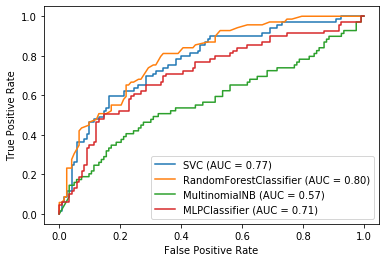

In [4]:
ax = None
for model in [SVC(),
              RandomForestClassifier(),
              MultinomialNB(),
              MLPClassifier(max_iter=300)]:
    
    model.fit(X_train, y_train)
    
    if ax is None:
        plot_roc_curve(model, X_test, y_test)
        ax = plt.gca()
    else:
        plot_roc_curve(model, X_test, y_test, ax=ax)